In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum06/data/fetal_health.csv')

In [5]:
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prediksi data uji
y_pred = svm_model.predict(X_test_scaled)

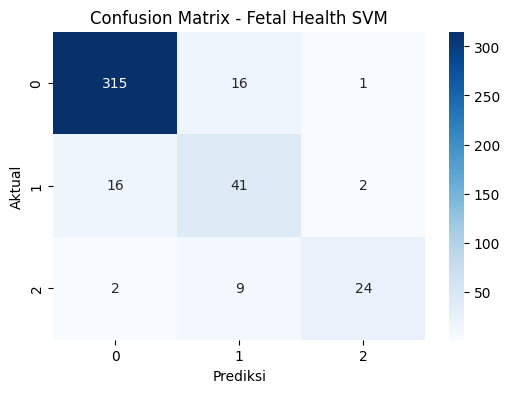

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Fetal Health SVM")
plt.show()

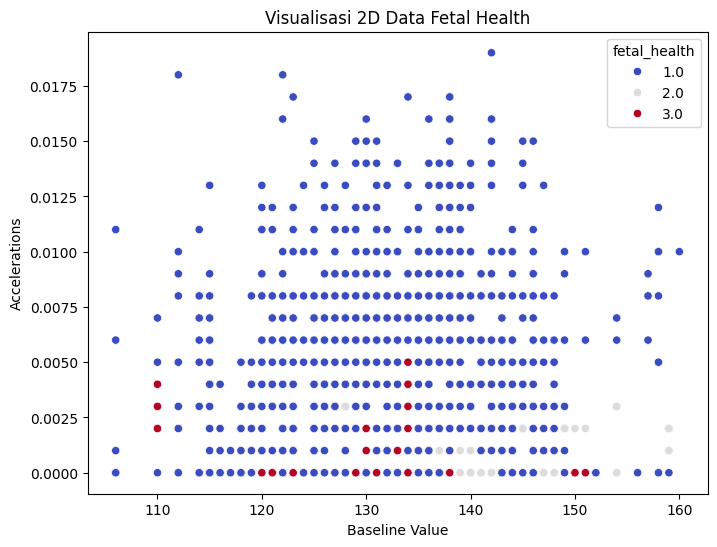

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['baseline value'],
    y=df['accelerations'],
    hue=df['fetal_health'],
    palette='coolwarm'
)
plt.title("Visualisasi 2D Data Fetal Health")
plt.xlabel("Baseline Value")
plt.ylabel("Accelerations")
plt.show()

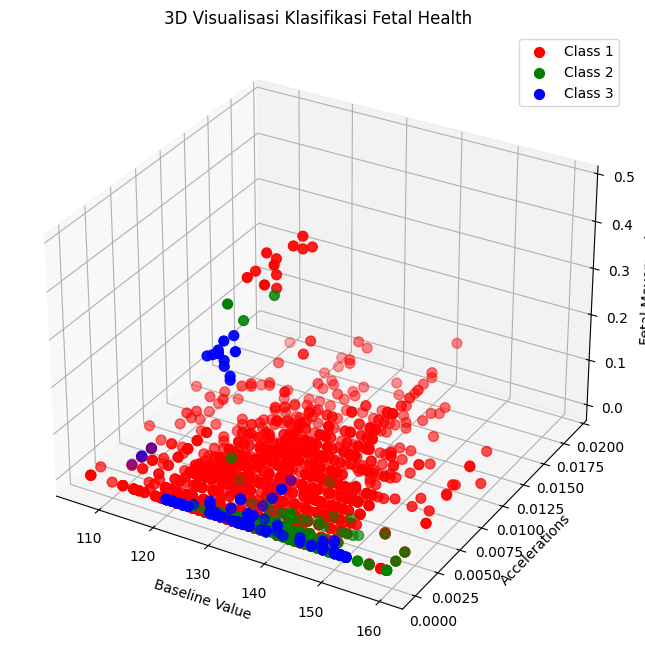

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = [1, 2, 3]

for color, label in zip(colors, labels):
    subset = df[df['fetal_health'] == label]
    ax.scatter(
        subset['baseline value'],
        subset['accelerations'],
        subset['fetal_movement'],
        color=color,
        label=f'Class {label}',
        s=50
    )

ax.set_xlabel('Baseline Value')
ax.set_ylabel('Accelerations')
ax.set_zlabel('Fetal Movement')
ax.set_title('3D Visualisasi Klasifikasi Fetal Health')
ax.legend()
plt.show()
